# Project Overview

### About Dataset
Crime in major metropolitan areas, such as London, occurs in distinct patterns. This data covers the number of criminal reports by month, LSOA borough, and major/minor category from Jan 2008-Dec 2016.


### Content
13M rows containing counts of criminal reports by month, LSOA borough, and major/minor category.

This dataset contains:
- lsoa_code: code for Lower Super Output Area in Greater London.
- borough: Common name for London borough.
- major_category: High level categorization of crime
- minor_category: Low level categorization of crime within major category.
- value: monthly reported count of categorical crime in given borough
- year: Year of reported counts, 2008-2016
- month: Month of reported counts, 1-12

### Inspiration:
Are there seasonal or time-of-week/day changes in crime occurrences? Any boroughs where particular crimes are increasing or decreasing? Policy makers use this data to plan upcoming budgets and deployment--can you use previous year crime reports to reliably predict later trends? If you normalize by borough population, can you find any areas where crime is more or less likely?


# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt
mpl.style.use('ggplot')
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import folium
from geopy.geocoders import Nominatim
import warnings
pd.options.mode.chained_assignment = None 
warnings.filterwarnings('ignore')

# Data Gathering, Data Cleaning, and Preparation

### Membaca dataset

In [2]:
df = pd.read_csv('london_crime_by_lsoa.csv')
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


### Mengetahui dimensi dataset

In [3]:
df.shape

(13490604, 7)

### Mengubah nama kolom pada dataset

In [4]:
df.columns = ['LSOA_Code','Borough', 'Major_Category', 'Minor_Category', 'Value', 'Year', 'Month']
df.head()

,LSOA_Code,Borough,Major_Category,Minor_Category,Value,Year,Month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


### Melakukan filterisasi data dengan value 0

In [5]:
df =  df.loc[df['Value'] != 0]
df.head()

,LSOA_Code,Borough,Major_Category,Minor_Category,Value,Year,Month
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
16,E01000086,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
24,E01001301,Ealing,Theft and Handling,Other Theft Person,2,2012,1
25,E01001794,Hackney,Violence Against the Person,Harassment,1,2013,2
32,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4


### Mengetahui tipe data dari setiap atribut dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3419099 entries, 9 to 13490600
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   LSOA_Code       object
 1   Borough         object
 2   Major_Category  object
 3   Minor_Category  object
 4   Value           int64 
 5   Year            int64 
 6   Month           int64 
dtypes: int64(3), object(4)
memory usage: 208.7+ MB


### Mengetahui missing values pada dataset

In [7]:
df.isnull().sum()

LSOA_Code         0
Borough           0
Major_Category    0
Minor_Category    0
Value             0
Year              0
Month             0
dtype: int64

### Menghitung jumlah value pada kolom Borough

In [8]:
df['Borough'].value_counts()

Lambeth                   152784
Croydon                   147203
Southwark                 144362
Ealing                    140006
Newham                    137275
Brent                     129925
Lewisham                  128232
Barnet                    127194
Tower Hamlets             120099
Wandsworth                118995
Enfield                   117953
Hackney                   116521
Haringey                  116315
Waltham Forest            114603
Camden                    112029
Islington                 111755
Hillingdon                110614
Westminster               110070
Bromley                   109855
Hounslow                  106561
Redbridge                 105932
Greenwich                 104654
Hammersmith and Fulham     92084
Barking and Dagenham       86849
Havering                   82288
Kensington and Chelsea     81295
Harrow                     73993
Bexley                     73948
Merton                     73661
Sutton                     62776
Richmond u

### Membuat dataframe baru dengan mengelompokkan berdasarkan Borough

In [9]:
df_crime = pd.pivot_table(df,values='Value',
                             index=['Borough'],
                             columns=['Major_Category'],
                             aggfunc=np.sum,fill_value=0)
df_crime.head()

Major_Category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
Borough,,,,,,,,,
Barking and Dagenham,18103,18888,9188,205,2819,6105,49,50999,43091
Barnet,36981,21024,9796,175,2953,7374,38,87285,46565
Bexley,14973,17244,7346,106,1999,2338,22,40071,30037
Brent,28923,20569,25978,157,3711,12473,39,72523,63178
Bromley,27135,24039,8942,196,2637,4868,31,69742,46759


# Exploratory Data Analysis (EDA)

### Deskriptif stastik 

In [10]:
df_crime.describe()

Major_Category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,22857.363636,19119.333333,14265.606061,161.363636,3222.696970,7844.636364,38.575758,80662.454545,47214.575758
std,7452.366846,5942.903618,7544.259564,81.603775,1362.107294,4677.643075,15.139002,45155.624776,17226.165191
min,15.000000,16.000000,33.000000,0.000000,17.000000,24.000000,0.000000,561.000000,114.000000
25%,18103.000000,17244.000000,8942.000000,106.000000,2358.000000,4744.000000,27.000000,52609.000000,33968.000000
50%,24871.000000,20405.000000,14101.000000,157.000000,3293.000000,7688.000000,40.000000,77940.000000,50943.000000
75%,27980.000000,22755.000000,18389.000000,207.000000,3963.000000,10084.000000,47.000000,92523.000000,59993.000000
max,36981.000000,31218.000000,34031.000000,323.000000,6504.000000,18408.000000,71.000000,277617.000000,72726.000000


### Menghitung total kejahatan berdasarkan Borough

In [11]:
df_crime['Total_Crime'] = df_crime.sum(axis=1)
df_crime.head()

Major_Category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person,Total_Crime
Borough,,,,,,,,,,
Barking and Dagenham,18103,18888,9188,205,2819,6105,49,50999,43091,149447
Barnet,36981,21024,9796,175,2953,7374,38,87285,46565,212191
Bexley,14973,17244,7346,106,1999,2338,22,40071,30037,114136
Brent,28923,20569,25978,157,3711,12473,39,72523,63178,227551
Bromley,27135,24039,8942,196,2637,4868,31,69742,46759,184349


## Question
### What is the frequency distribution of the years for crimes number in London from January until December 2008-2016?

In [12]:
df_y = pd.DataFrame(
    df.groupby(['Borough', 'Year'])['Value'].sum().unstack())
df_y.head()

Year,2008,2009,2010,2011,2012,2013,2014,2015,2016
Borough,,,,,,,,,
Barking and Dagenham,17656.0,17713.0,17130.0,16686.0,15990.0,15759.0,15426.0,16346.0,16741.0
Barnet,23944.0,23449.0,23416.0,24007.0,23573.0,22510.0,22572.0,24036.0,24684.0
Bexley,15305.0,14445.0,13166.0,11325.0,11669.0,11552.0,11844.0,11990.0,12840.0
Brent,23504.0,24748.0,25512.0,27669.0,26357.0,23759.0,24426.0,24883.0,26693.0
Bromley,24015.0,21858.0,19572.0,19868.0,19622.0,18945.0,19668.0,20637.0,20164.0


### Menampilkan plot histogram untuk meviasualisasikan data

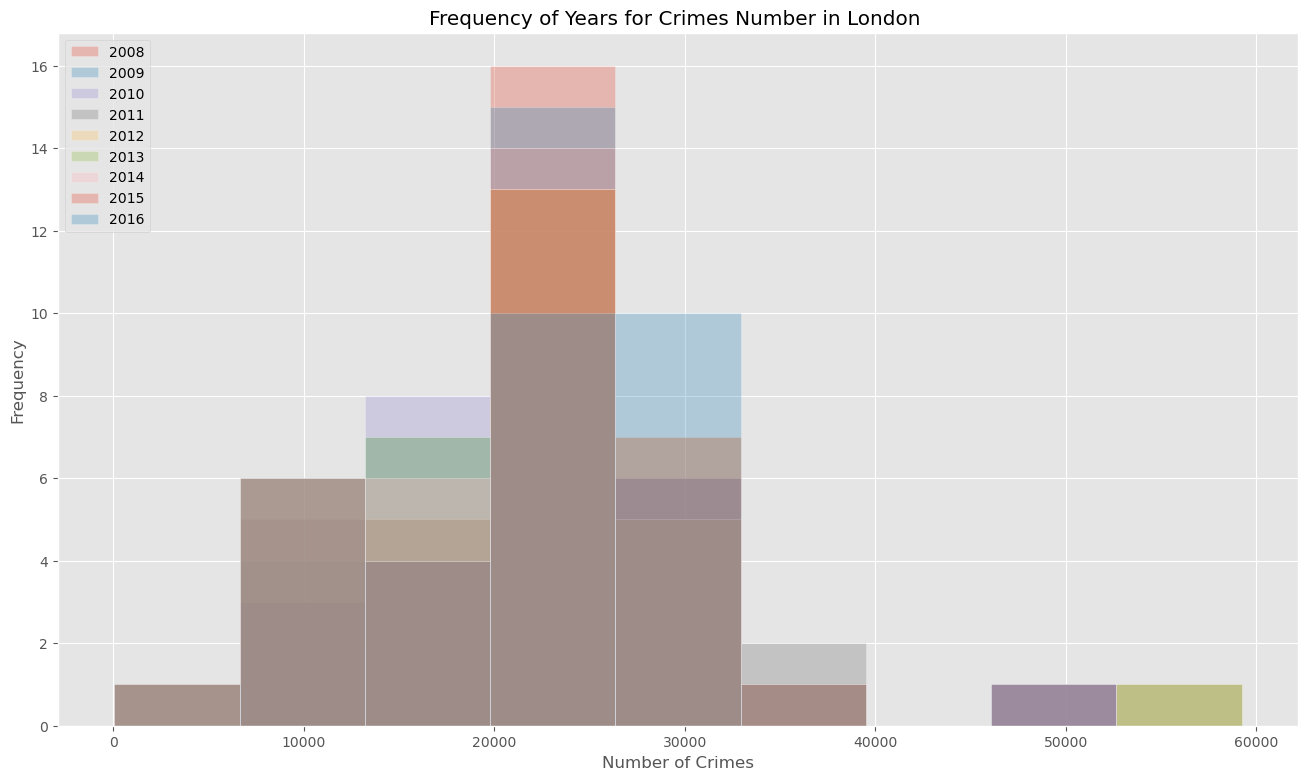

In [13]:
ax = df_y.plot(kind='hist',           
              figsize=(16, 9),
               # color=['coral', 'darkslateblue', 'mediumseagreen'], 
               alpha=0.3,
               rot=0,
               bins=9,
               edgecolor='white'
              )

ax.set_title('Frequency of Years for Crimes Number in London ')
ax.set_xlabel('Number of Crimes')
ax.legend(loc='upper left') 

Dapat kita lihat, secara keseluruhan setiap tahunnya beberapa wilayah mencatat jumlah kriminalitas di range 0-5923, 5923-11845, dan seterusnya, tetapi tidak ada daerah yang mencatat jumlah kriminalitas pada range 38664-42960 dan 42960-47256 di tahun berapa pun.

## Question
### What is the frequency distribution of the month for crimes number in London from January until December 2008-2016

In [14]:
df_m = pd.DataFrame(
    df.groupby(['Borough', 'Month'])['Value'].sum().unstack())
df_m.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Borough,,,,,,,,,,,,
Barking and Dagenham,12610,12193,13451,12323,12844,12451,13205,12315,11883,12203,12572,11397
Barnet,17550,16659,18447,17421,17999,17908,18297,16775,16902,18398,18523,17312
Bexley,9576,8959,10133,9179,9903,9492,9805,9063,9053,9783,9929,9261
Brent,18744,17535,19296,18026,19718,19342,19698,18478,18184,20189,20033,18308
Bromley,15770,14684,15843,14714,15785,15159,16164,14703,14616,15757,15749,15405


### Mengganti nama kolom pada dataframe df_m

In [15]:
df_m.columns = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

### Menampilkan plot histogram untuk meviasualisasikan data

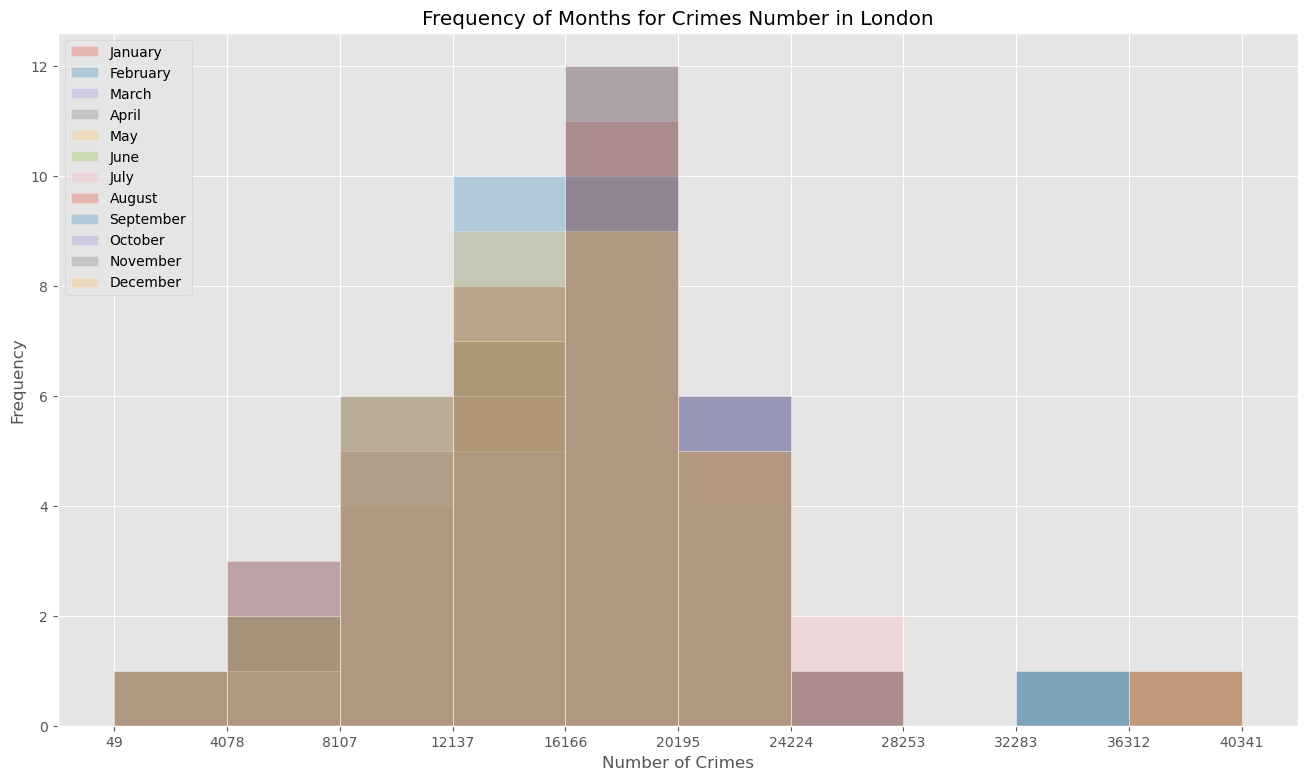

In [16]:
count, bin_edges = np.histogram(df_m)

ax = df_m.plot(kind='hist',           
              figsize=(16, 9),
              rot=0,
              alpha=0.3,
               xticks=bin_edges,
              edgecolor='white'
              )

ax.set_title('Frequency of Months for Crimes Number in London')
ax.set_xlabel('Number of Crimes')
ax.legend(loc='upper left') 

Dapat kita lihat, secara keseluruhan setiap bulannya beberapa wilayah mencatat jumlah kriminalitas tetapi tidak ada daerah yang mencatat jumlah kriminalitas pada range 0-49 dan 28253-32283 di tahun bulan apapun.

## Crimes Rate by Borough in London from 2008-2016

### Menampilkan data bulan pada 2008 dengan Major Category Theft and Handling 

In [17]:
df_x = df['Borough'].value_counts().to_frame().reset_index()
df_x.columns = ['Borough', 'Total']
df_x = df_x.set_index('Borough')
df_x.sort_values(by='Total')

,Total
Borough,
City of London,565
Kingston upon Thames,46846
Richmond upon Thames,61857
Sutton,62776
Merton,73661
Bexley,73948
Harrow,73993
Kensington and Chelsea,81295
Havering,82288


### Menampilkan plot barh untuk meviasualisasikan data

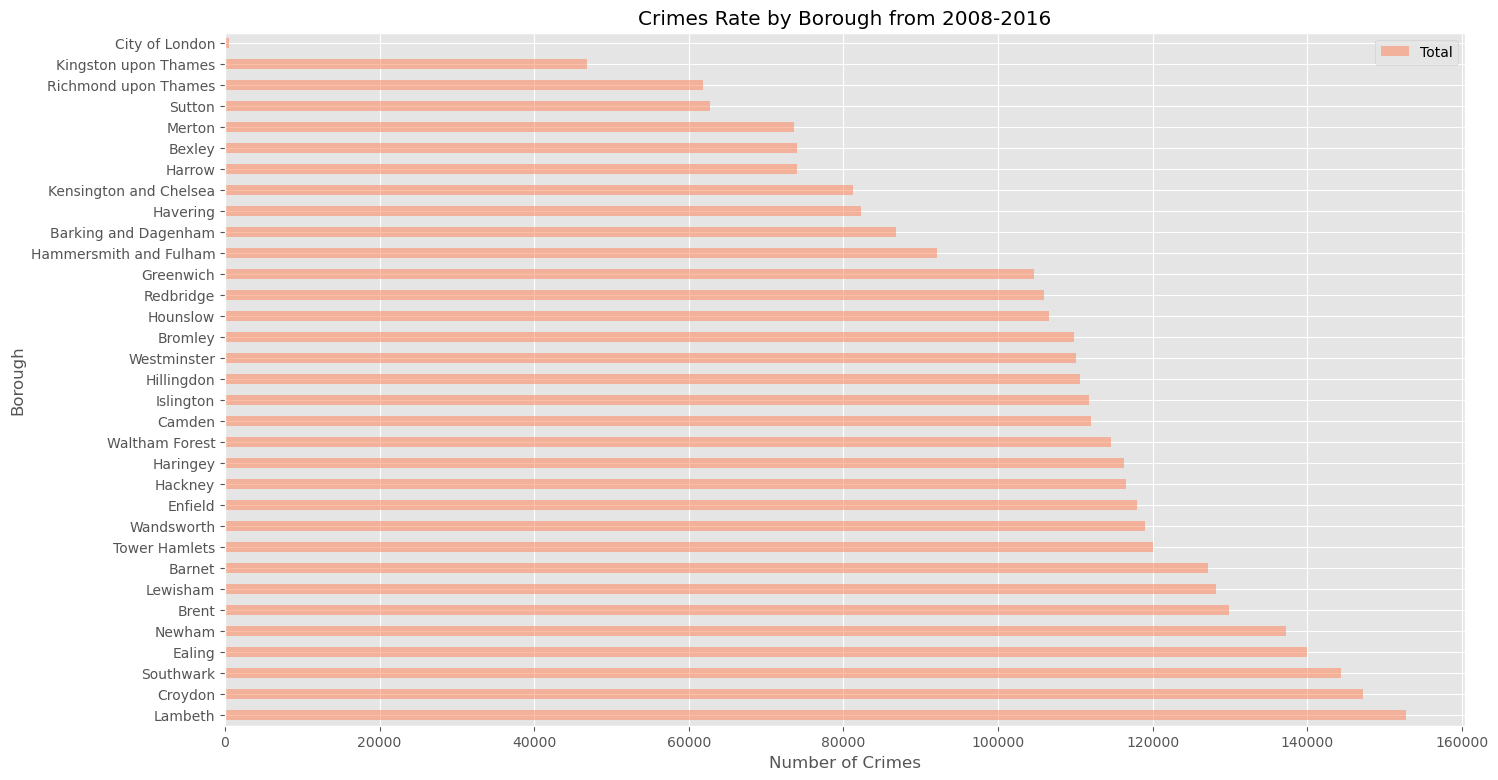

In [18]:
df_x.plot(kind='barh', 
              alpha=0.5,           
              figsize=(16, 9),
              rot=0,
              color='coral')

plt.title('Crimes Rate by Borough from 2008-2016')
plt.xlabel('Number of Crimes')
plt.ylabel('Borough')


plt.show()

Dari plot di atas dapat dilihat bahwa wilayah Lambeth merupakan wilayah dengan kejahatan kriminal paling banyak. Setelah Lambeth, Croydon dan Southwark menyusul dengan selisih jumlah yang relatif kecil. Sebaliknya, wilayah dengan kejahatan kriminal paling sedikit adalah City of London, wilayah ini berada di urutan terakhir dan memiliki selisih yang besar dengan jumlah kejatahan kiriminal di urutan sebelumnya, yaitu wilayah Kingston upon Thames.

## Question :
### Which London boroughs has the most crime?

In [19]:
df_crime.sort_values(['Total_Crime'], axis = 0, ascending=False, inplace=True)
df_crime_head = df_crime.head(5)
df_crime_head

Major_Category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person,Total_Crime
Borough,,,,,,,,,,
Westminster,29295,20405,34031,273,6148,15752,59,277617,71448,455028
Lambeth,30199,26136,25083,137,4520,18408,70,114899,72726,292178
Southwark,27980,24450,27381,321,4696,16153,40,109432,68356,278809
Camden,27939,18482,21816,123,3857,9286,36,140596,53012,275147
Newham,25356,24177,18389,323,4456,16913,43,106146,66221,262024


### Menampilkan plot area untuk meviasualisasikan data

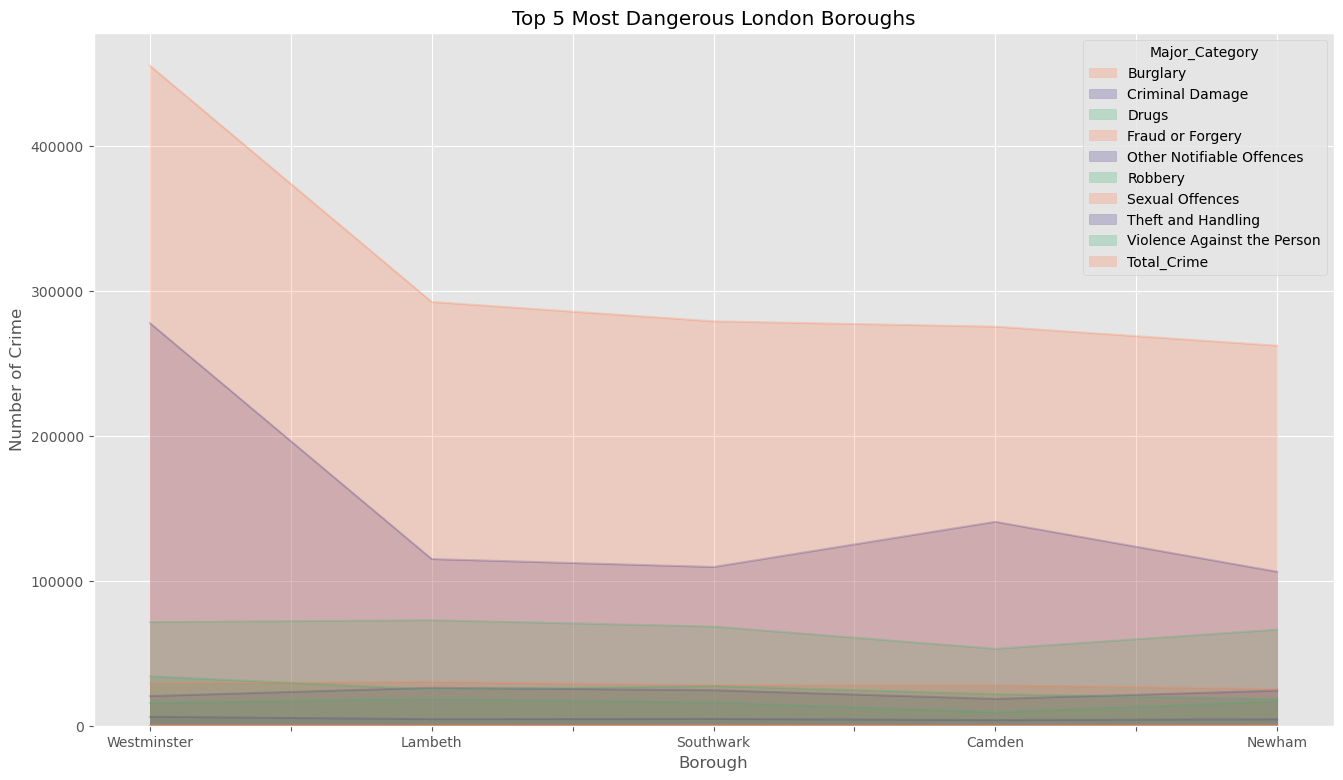

In [20]:
df_crime_head.plot(kind='area',
                  alpha = 0.25,
                  stacked=False,
                  figsize=(16, 9),
                  color=['coral', 'darkslateblue', 'mediumseagreen']  
             )
plt.title('Top 5 Most Dangerous London Boroughs')
plt.ylabel('Number of Crime')
plt.xlabel('Borough')

plt.show()

- Wilayah dengan tingkat kriminalitas tinggi dibandingkan wilayah lain yang terdapat di London adalah Westminster dengan total 455028. Westminster merupakan salah satu wilayah yang luas dengan populasi yang tinggi karena wilayah ini merupakan kawasan wisata dan pusat politik Kerajaan Iggris. Terdapat 1.580 kejahatan yang dilaporkan per km². 

- Pada posisi kedua, wilayah dengan kriminalitas tinggi setelah Westminster adalah Lambeth dengan total 292178. Lambeth merupakan salah satu wilayah paling terkenal di London karena mereka pencipta UK Drill. UK Drill adalah gaya musik atau subgenre yang berafiliasi dengan geng atau berasal dari lingkungan yang kekurangan kemampuan ekonomi dan sosial sehingga kejahatan menjadi cara untuk bertahan hidup bagi banyak orang. Lambeth juga menjadi pusat kejahatan senjata dan pisau untuk geng terkenal.

- Pada posisi ketiga, wilayah dengan kriminalitas tinggi setelah Lambeth adalah Southwark dengan total 278809 kejahatan dan 980 kejahatan yang dilaporkan per km². Southwark merupaka wilayah dengan kejahatan senjata yang tinggi karena setiap setiap orang memiliki kemungkinan untuk kepemilikan senjata api.  

- Pada posisi Keempat, wilayah dengan kriminalitas tinggi setelah Southwark adalah Camden dengan total 275147 kejahaatan. Camden adalah wilayah dengan nightlife area karena beberapa klub malam terbaik di London terdapat di wilayah ini. Hal ini selaras dengan tingginya kejahatan yang terjadi dengan 1.110 kejahatan per km² dalam satu tahun.

- Pada posisi Keempat, wilayah dengan kriminalitas tinggi setelah Camden adalah Newham dengan total 262024 kejahatan. Dilaporkan sebanyak 800 kejahatan terjadi kejahatan per km² dalam satu tahun dengan pusat kejahatan di Stratford, Beckton dan Upton Park.

## Question
### Which London boroughs has the lowest crimes?

In [21]:
df_crime_least = df_crime.tail(5)
df_crime_least

Major_Category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person,Total_Crime
Borough,,,,,,,,,,
Bexley,14973,17244,7346,106,1999,2338,22,40071,30037,114136
Sutton,13207,14474,4586,57,1393,2308,20,39533,25409,100987
Richmond upon Thames,16097,11722,4707,37,1420,1590,26,40858,20314,96771
Kingston upon Thames,10131,10610,5682,65,1332,1702,18,38226,21540,89306
City of London,15,16,33,0,17,24,0,561,114,780


### Menampilkan plot area untuk meviasualisasikan data

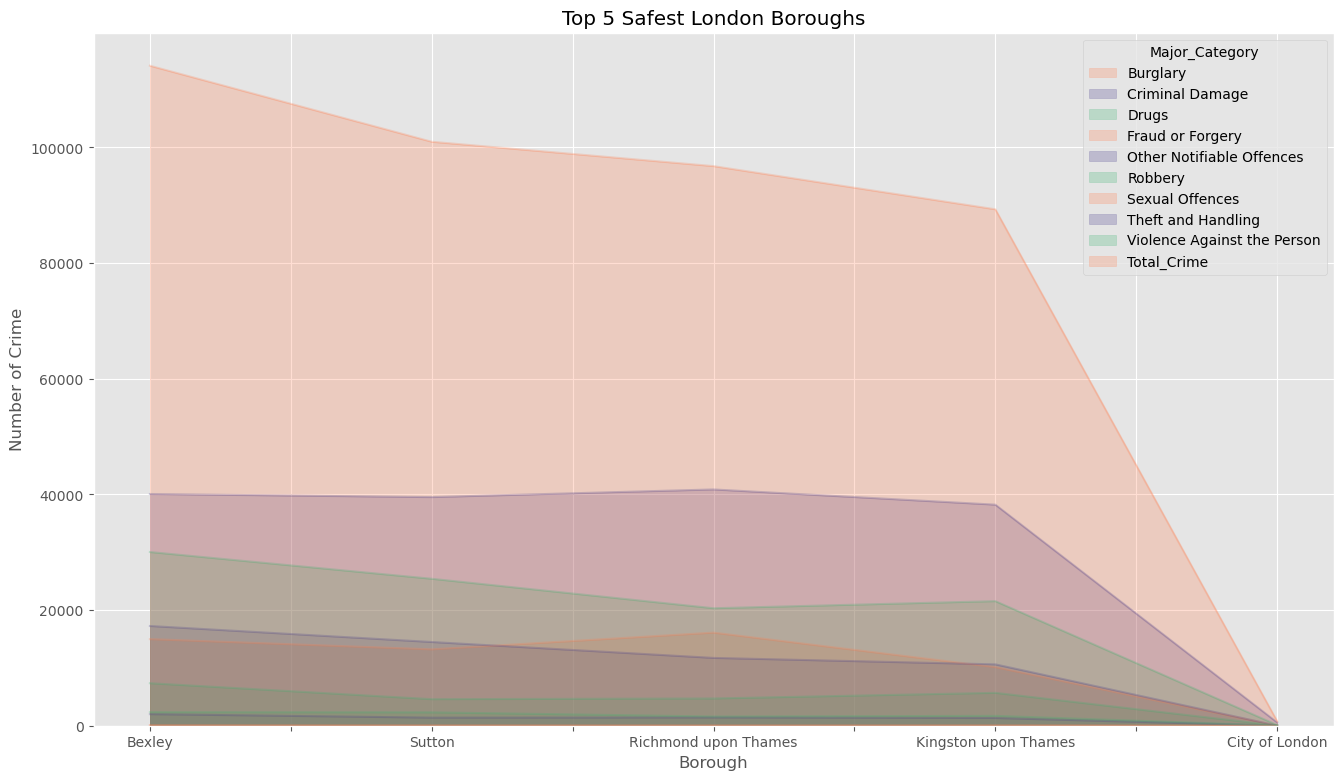

In [22]:
df_crime_least.plot(kind='area',
                  alpha = 0.25,
                  stacked=False,
                  figsize=(16, 9),
                  color=['coral', 'darkslateblue', 'mediumseagreen']  
             )
plt.title('Top 5 Safest London Boroughs')
plt.ylabel('Number of Crime')
plt.xlabel('Borough')

plt.show()

- Wilayah dengan tingkat kriminalitas paling rendah dibandingkan wilayah lain yang terdapat di London adalah City of London dengan total 780 kejahatan. City of London sendiri merupakan wilayah yang paling kecil dengan populasi hanya 10,9 ribu orang. 

- Pada posisi kedua, wilayah dengan kriminalitas rendah setelah City of London adalah Kingston upon Thames. Tingkat kejahatan di Kingston upon Thames adalah 57 kejahatan per seribu warga dengan total 89306 kejahatan. 

- Pada posisi ketiga, wilayah dengan kriminalitas rendah adalah Richmond upon Thames dengan tingkat kejahatan yaitu, 57 kejahatan per seribu warga dan total 96771 kejahatan. Richmond upon Thames terasa seperti pedesaan dibandingkan wilayah London lainnya. 

- Pada posisi Keempat, wilayah dengan kriminalitas rendah adalah Sutton dengan total 100987 kejahatan. Sutton dikenal sebagai daerah sepi dan tenang yang sangat cocok untuk keluarga.

- Pada posisi Keempat, wilayah dengan kriminalitas rendah setelah Sutton adalah Bexley dengan total 114136 kejahatan. Tidak jauh berbeda dengan Sutton, Bexley dikenal sebagai wilayah pedesaan dan memiliki banyak ruang hijau. 

## Crimes Rate by Major Category from 2008-2016

### Menampilkan data pada 2008-2016 berdasarkan Major Category 

In [23]:
df_crime = pd.pivot_table(df,values='Value',
                             index=['Major_Category'],
                             columns=['Year'],
                             aggfunc=np.sum,fill_value=0)
df_crime.columns.name=None
df_crime_a = df_crime.iloc[:,:]
df_crime = df_crime_a.head(10)
df_crime = df_crime.transpose()
df_crime 

Major_Category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
2008,88092,91872,68804,5325,10112,29627,1273,283692,159844
2009,90619,85565,60549,0,10644,29568,0,279492,160777
2010,86826,77897,58674,0,10768,32341,0,290924,157894
2011,93315,70914,57550,0,10264,36679,0,309292,146901
2012,93392,62158,51776,0,10675,35260,0,334054,150014
2013,87222,56206,50278,0,10811,29337,0,306372,146181
2014,76053,59279,44435,0,13037,22150,0,279880,185349
2015,70489,62976,39785,0,14229,21383,0,284022,218740
2016,68285,64071,38914,0,15809,22528,0,294133,232381


### Menampilkan plot bar untuk meviasualisasikan data

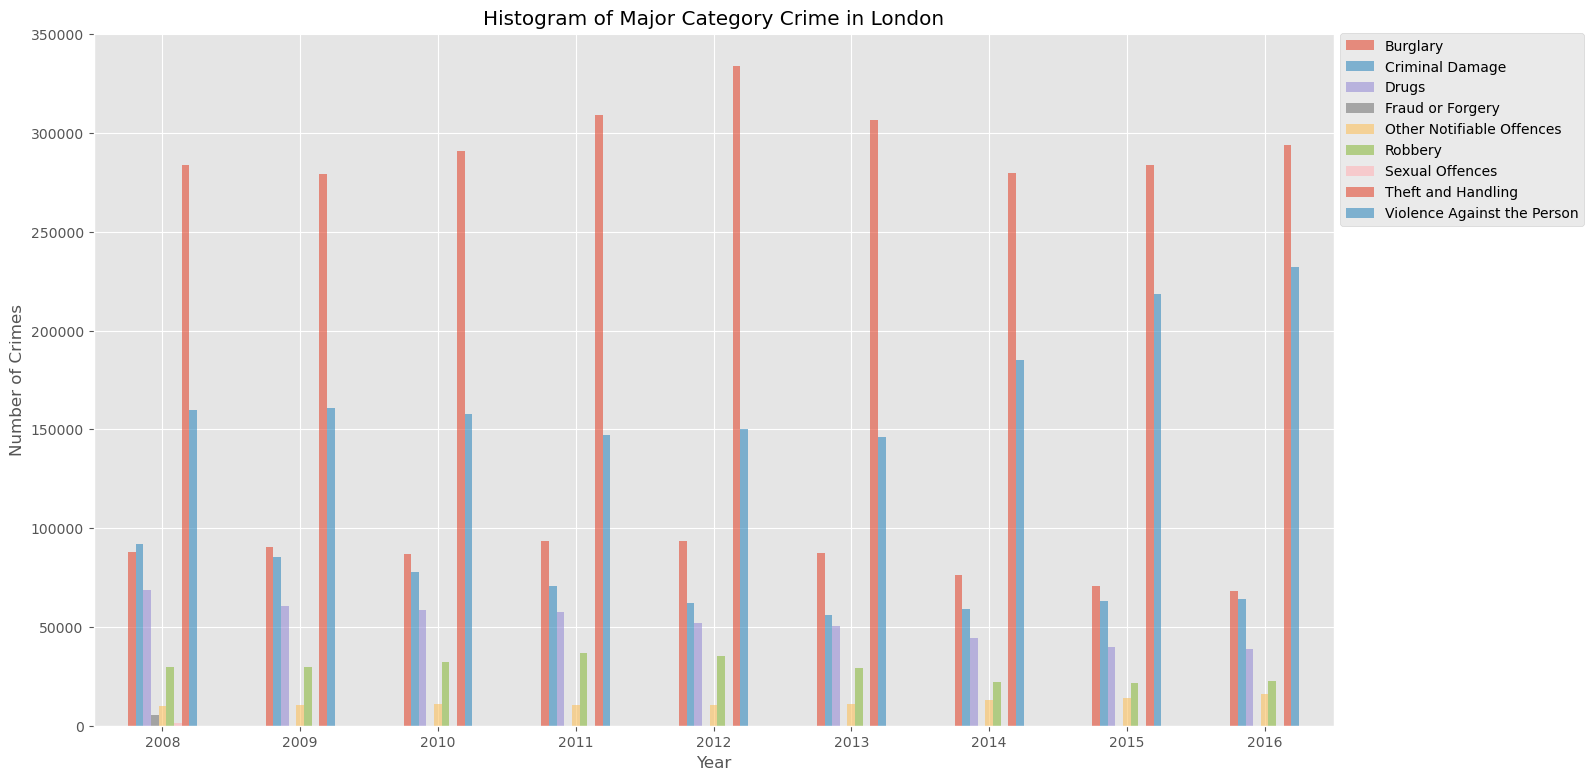

In [24]:
count, bin_edges = np.histogram(df_crime, 15)

df_crime.plot(kind='bar', 
              # bins=15,
              alpha=0.6,
              # xticks=bin_edges,
              rot=0,
              figsize=(16, 9))

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.86))
plt.title('Histogram of Major Category Crime in London')
plt.ylabel('Number of Crimes')
plt.xlabel('Year')

plt.show()

Kejahatan kategori besar yang terjadi dengan frekuensi tinggi adalah Burglary. Kejahatan ini cenderung stabil terjadi dengan jumlah yang cukup besar setiap tahunnya. Sebaliknya kejahatan kategori besar yang terjadi dengan frekuensi rendah adalah Fraud or Forgery, dimana pada tahun kejahatan ini hanya terjadi pada tahun 2008 dan pada tahun 2009-2016 kejahatan ini tidak terjadi.

## Crimes Rate by Minor Category from 2008-2016

### Menampilkan data pada 2008-2016 berdasarkan Minor Category 

In [25]:
df_crime = pd.pivot_table(df,values='Value',
                             index=['Minor_Category'],
                             columns=['Year'],
                             aggfunc=np.sum,fill_value=0)
df_crime.columns.name=None
df_crime_a = df_crime.iloc[:,:]
df_crime = df_crime_a.head(10)
df_crime = df_crime.transpose()
df_crime

Minor_Category,Assault with Injury,Burglary in Other Buildings,Burglary in a Dwelling,Business Property,Common Assault,Counted per Victim,Criminal Damage To Dwelling,Criminal Damage To Motor Vehicle,Criminal Damage To Other Building,Drug Trafficking
2008,56586,31437,56655,2964,37356,3840,23519,41693,9011,4203
2009,55297,30434,60185,3115,39671,0,22475,36621,8348,4172
2010,54173,29703,57123,3041,41591,0,20253,32907,7962,4252
2011,50768,30876,62439,2685,40502,0,18037,29494,7445,4460
2012,50369,31676,61716,2450,39246,0,15330,25777,6753,3964
2013,39929,30685,56537,2026,37882,0,13512,23452,6367,4151
2014,45677,27078,48975,1642,51244,0,13391,24137,6641,3830
2015,48164,25833,44656,1718,61758,0,13648,25595,6776,3395
2016,50038,25289,42996,1654,64440,0,13951,25787,6700,3392


### Menampilkan plot bar untuk meviasualisasikan data

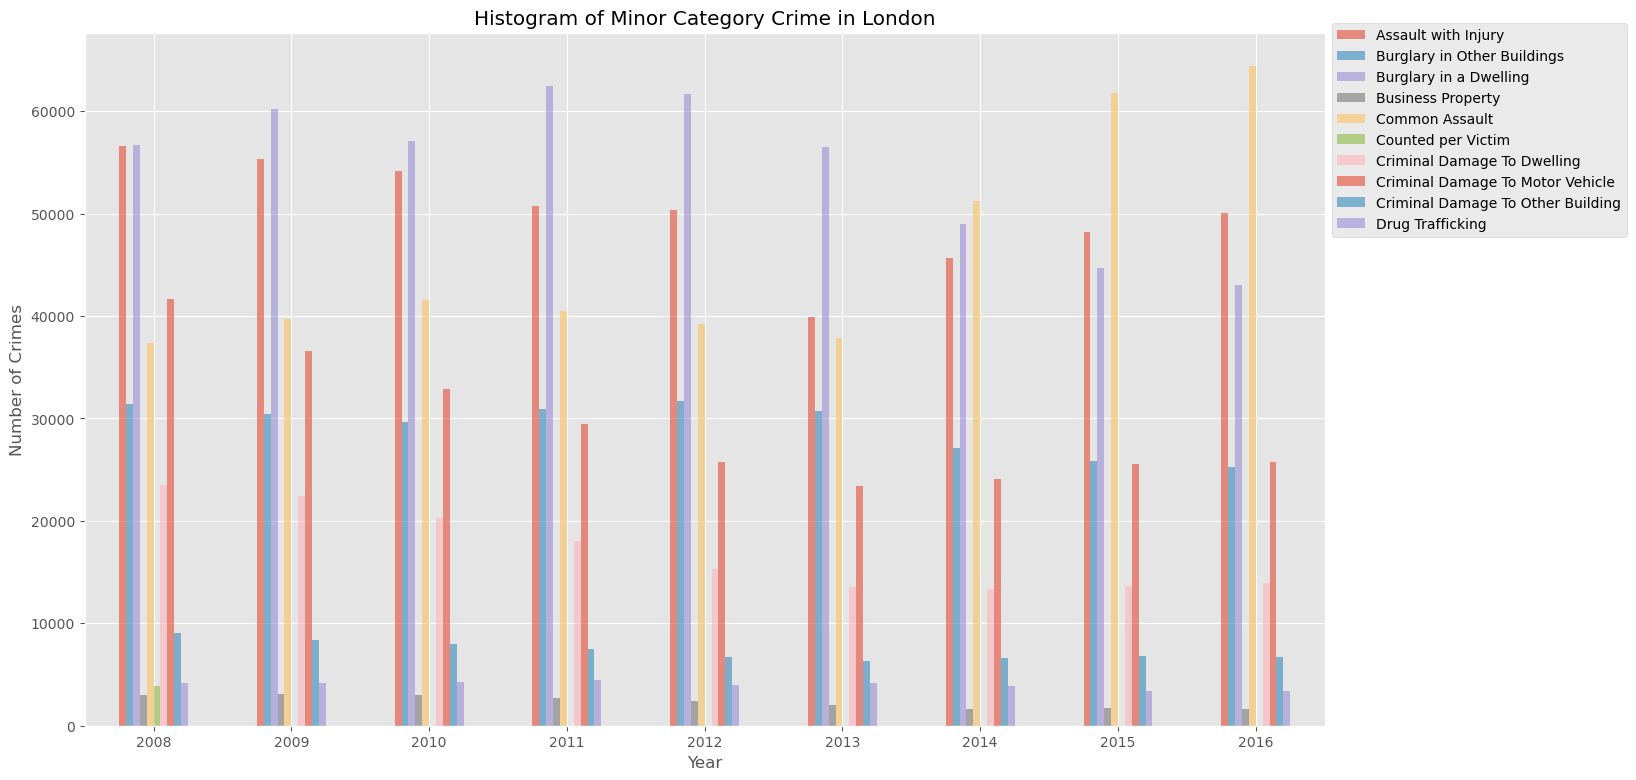

In [26]:
count, bin_edges = np.histogram(df_crime, 15)

df_crime.plot(kind='bar', 
              # bins=15,
              alpha=0.6,
              # xticks=bin_edges,              
              figsize=(16, 9),
              rot=0
             )

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.86))
plt.title('Histogram of Minor Category Crime in London')
plt.ylabel('Number of Crimes')
plt.xlabel('Year')

plt.show()

Kejahatan kategori kecil yang terjadi dengan frekuensi tinggi adalah Burglary in Dweling. Kejahatan ini cenderung stabil terjadi dengan jumlah yang cukup besar setiap tahunnya. Sebaliknya kejahatan kategori kecil yang terjadi dengan frekuensi rendah adalah Business Property.

### Membuat dataframe baru dengan mengelompokkan berdasarkan Major Category(index) dan tahun(column) 

In [27]:
df_crime = pd.pivot_table(df,values='Value',
                             index=['Major_Category'],
                             columns=['Year'],
                             aggfunc=np.sum,fill_value=0)
df_crime

Year,2008,2009,2010,2011,2012,2013,2014,2015,2016
Major_Category,,,,,,,,,
Burglary,88092,90619,86826,93315,93392,87222,76053,70489,68285
Criminal Damage,91872,85565,77897,70914,62158,56206,59279,62976,64071
Drugs,68804,60549,58674,57550,51776,50278,44435,39785,38914
Fraud or Forgery,5325,0,0,0,0,0,0,0,0
Other Notifiable Offences,10112,10644,10768,10264,10675,10811,13037,14229,15809
Robbery,29627,29568,32341,36679,35260,29337,22150,21383,22528
Sexual Offences,1273,0,0,0,0,0,0,0,0
Theft and Handling,283692,279492,290924,309292,334054,306372,279880,284022,294133
Violence Against the Person,159844,160777,157894,146901,150014,146181,185349,218740,232381


### Membuat dataframe baru dengan mengelompokkan berdasarkan Major Category(index) pada 2008-2010

In [28]:
df_crime_a = df_crime.iloc[:,0:3]
df_crime_a

Year,2008,2009,2010
Major_Category,,,
Burglary,88092,90619,86826
Criminal Damage,91872,85565,77897
Drugs,68804,60549,58674
Fraud or Forgery,5325,0,0
Other Notifiable Offences,10112,10644,10768
Robbery,29627,29568,32341
Sexual Offences,1273,0,0
Theft and Handling,283692,279492,290924
Violence Against the Person,159844,160777,157894


#### Menampilkan plot barh untuk meviasualisasikan data

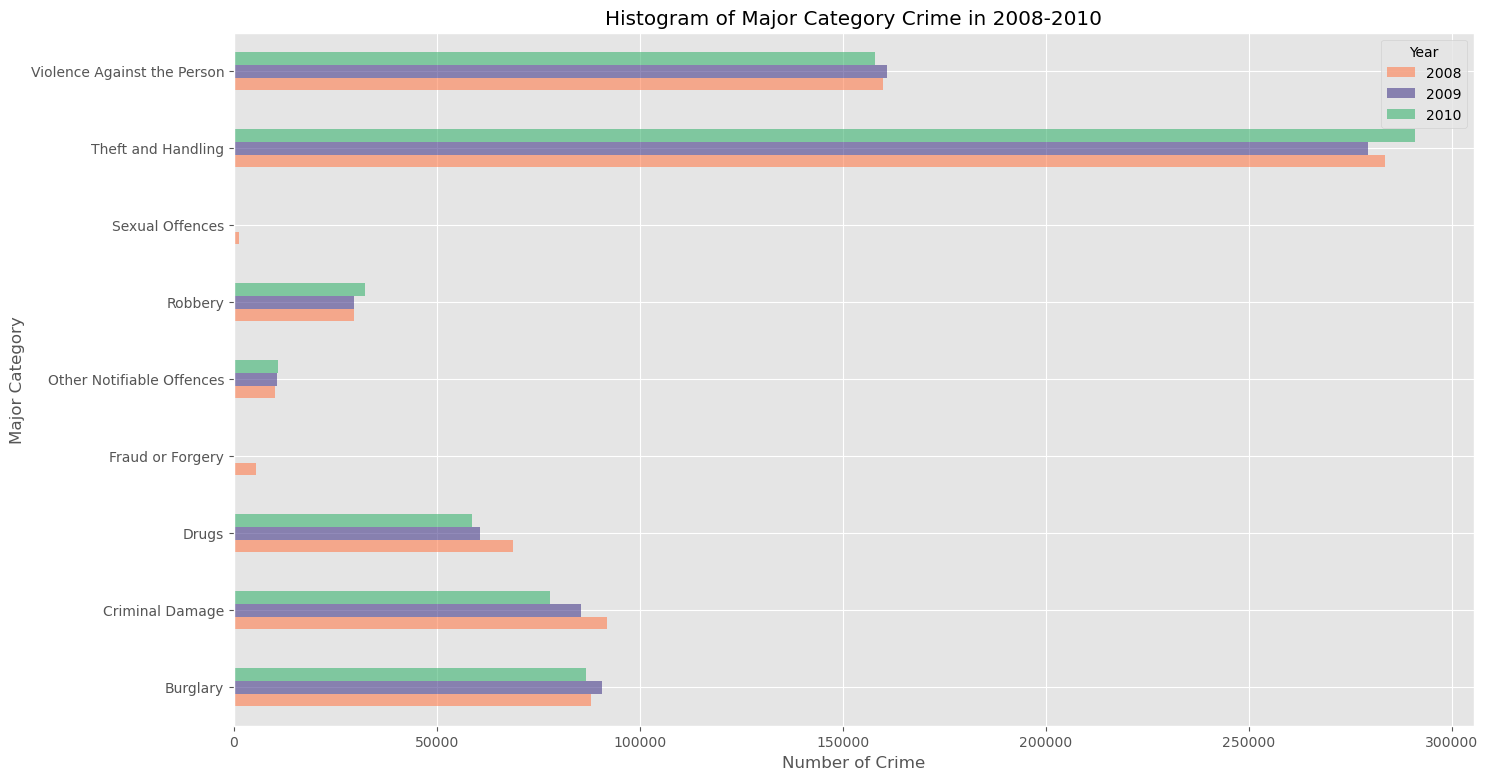

In [29]:
df_crime_a.plot(kind='barh',
              figsize=(16,9),
              alpha=0.6,
              color=['coral', 'darkslateblue', 'mediumseagreen']     
             )

plt.title('Histogram of Major Category Crime in 2008-2010')
plt.ylabel('Major Category')
plt.xlabel('Number of Crime')
plt.show()

Kejahatan kategori besar yang terjadi dengan frekuensi yang tinggi pada tahun 2008-2010 adalah Theft and Handling. Sebaliknya kejahatan kategori besar yang terjadi dengan frekuensi yang rendah pada tahun 2008-2010 adalah Fraud or Forgery, dimana pada tahun 2009 dan 2010 kejahatan tersebut tidak terjadi. 

## Theft and Handling Crime in Westminster Borough from 2008-2016

#### Menampilkan dataframe dengan melakukan seleksi apabila value Borough adalah Westminster dan value Major Category adalah Theft and Handling pada 2008-2016

In [30]:
df_x = df[(df['Borough']=='Westminster') & (df['Major_Category'] == 'Theft and Handling')]
df_x.head()

,LSOA_Code,Borough,Major_Category,Minor_Category,Value,Year,Month
134,E01004674,Westminster,Theft and Handling,Motor Vehicle Interference & Tampering,1,2014,4
187,E01004654,Westminster,Theft and Handling,Theft From Motor Vehicle,3,2013,2
227,E01004750,Westminster,Theft and Handling,Theft From Motor Vehicle,6,2016,8
280,E01004679,Westminster,Theft and Handling,Theft From Shops,5,2008,8
751,E01004657,Westminster,Theft and Handling,Other Theft,11,2008,9


In [31]:
df_x = df[(df['Borough']=='Westminster') & (df['Major_Category'] == 'Theft and Handling')]
df_x = df_x[['Year']].value_counts()

cols = ('Total_Crime',)
df_x = pd.DataFrame(df_x, columns=cols)
df_x = df_x.sort_values('Year')
df_x

,Total_Crime
Year,
2008,4096
2009,4033
2010,4015
2011,4164
2012,4761
2013,4632
2014,4691
2015,4617
2016,5004


#### Menampilkan plot bar untuk meviasualisasikan data

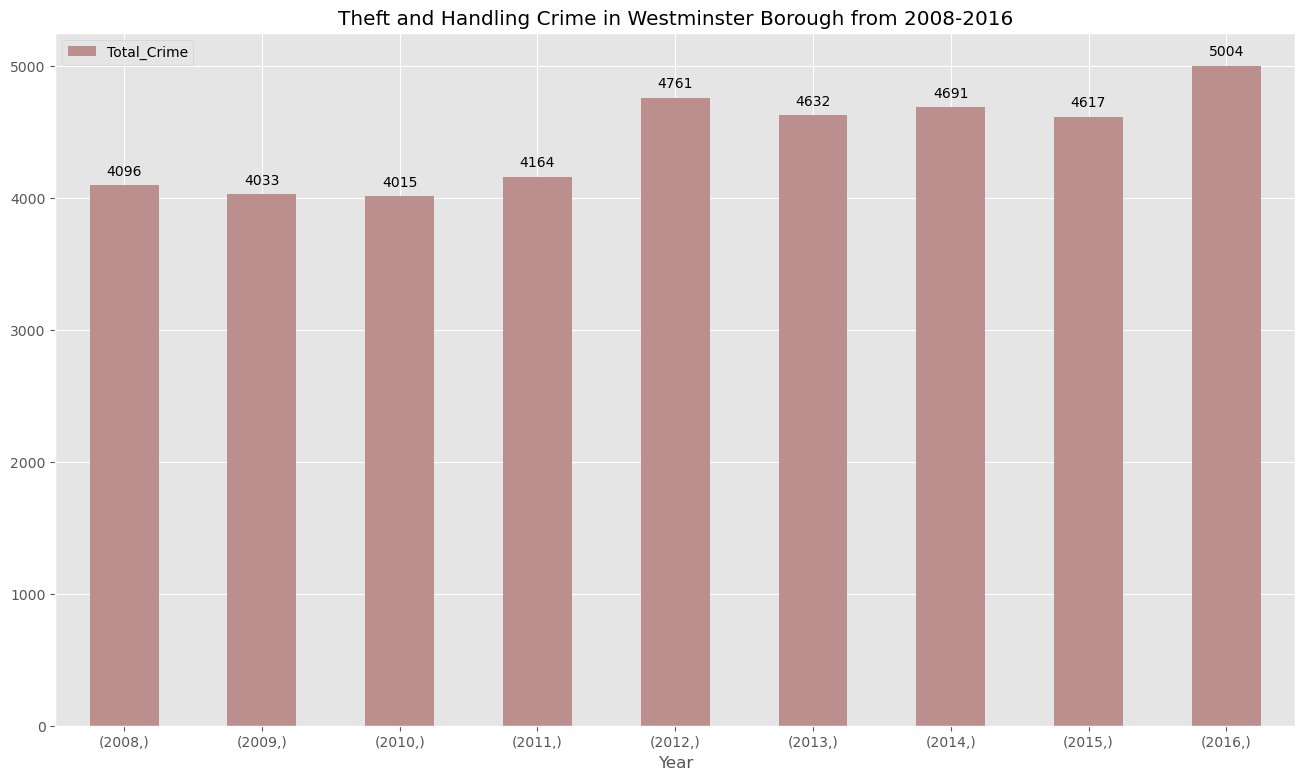

In [32]:
ax = df_x.plot(kind='bar',           
              figsize=(16, 9),
              color='rosybrown', 
              rot=0 
              )

ax.set_title('Theft and Handling Crime in Westminster Borough from 2008-2016')
ax.set_xlabel('Year')
ax.legend(loc='upper left') 

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 10, 
               )

Theft and Handling merupakan kejahatan kategori besar dengan frekuensi terjadi yang tinggi sedangkan Westminster merupakan wilayah dengan tingkat kejahatan yang tinggi pula. Theft and Handling di wilayah Westminter terjadi dengan frekuensi yang tinggi pada tahun 2016 dengan jumlah 5004 setelah sebelumnya mengalami penurunan dari tahun 2012. Sebaliknya pada tahun 2010 menjadi tahun dimana kejahatan theft and handling paling sedikit dilakukan dengan total 4015 kejahatan.

## Question
### What Month Theft and Handling Crime Occurred Most Frequently in Westminster 2016?

In [33]:
df_x = df[(df['Borough']=='Westminster') & (df['Major_Category'] == 'Theft and Handling') & (df['Year'] == 2016)]
df_x = df_x['Month'].value_counts().reset_index()

df_x.columns = ['Month', 'Total_Crime']
df_x = df_x.sort_values('Month').set_index('Month')
df_x.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Des']
df_x

,Total_Crime
Jan,357
Feb,354
Mar,394
Apr,400
May,416
June,449
July,459
Aug,445
Sep,412
Oct,442


#### Menampilkan plot bar untuk meviasualisasikan data

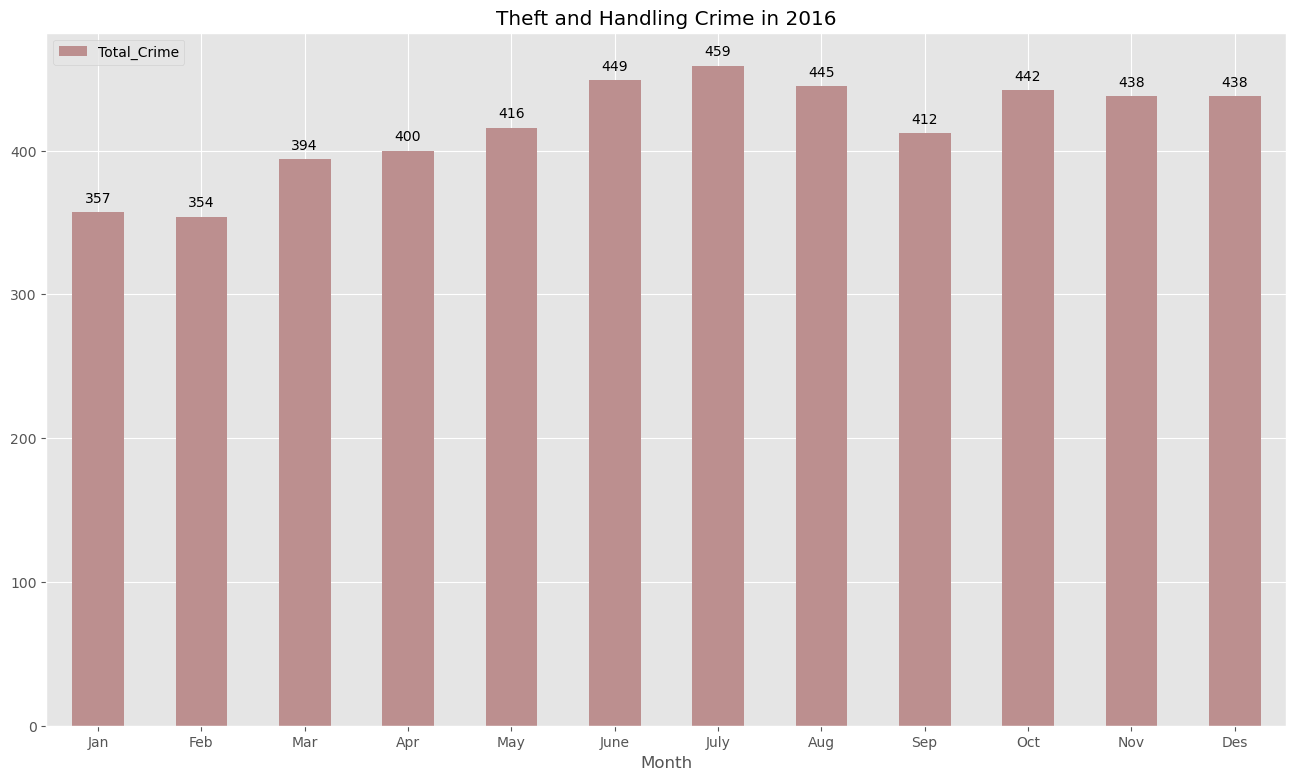

In [34]:
ax = df_x.plot(kind='bar', 
              figsize=(16, 9),
              color='rosybrown', 
              rot=0 
              )

ax.set_title('Theft and Handling Crime in 2016')
ax.set_xlabel('Month')
ax.legend(loc='upper left') 

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 10, 
               )

Kejahatan Major Category Theft and Handling di Westinster pada tahun 2016 terjadi dengan frekuensi yang tinggi di bulan July dengan 459 kasus. Sebaliknya pada bulan Januari, kejahatan ini hanyak terjadi sebanyak 357 kali.

## Theft and Handling Crime in City of London borough from 2008-2016

#### Menampilkan dataframe dengan melakukan seleksi apabila value Borough adalah City of London dan value Major Category adalah Theft and Handling pada 2008-2016

In [35]:
df_x = df[(df['Borough']=='City of London') & (df['Major_Category'] == 'Theft and Handling')]
df_x.head()

,LSOA_Code,Borough,Major_Category,Minor_Category,Value,Year,Month
29291,E01000003,City of London,Theft and Handling,Other Theft Person,1,2015,5
74471,E01000003,City of London,Theft and Handling,Other Theft Person,1,2015,6
108087,E01000002,City of London,Theft and Handling,Other Theft,1,2016,11
166954,E01032739,City of London,Theft and Handling,Theft/Taking of Pedal Cycle,1,2013,6
219623,E01032740,City of London,Theft and Handling,Other Theft,1,2016,2


In [36]:
df_x = df[(df['Borough']=='City of London') & (df['Major_Category'] == 'Theft and Handling')]
df_x = df_x[['Year']].value_counts()

cols = ('Total_Crime',)
df_x = pd.DataFrame(df_x, columns=cols)
df_x = df_x.transpose()
df_x[[2008, 2009, 2010]] = 0
df_x = df_x.transpose()
df_x = df_x.sort_values('Year')
df_x

,Total_Crime
Year,
2008,0
2009,0
2010,0
2011,29
2012,70
2013,62
2014,57
2015,73
2016,78


#### Menampilkan plot bar untuk meviasualisasikan data

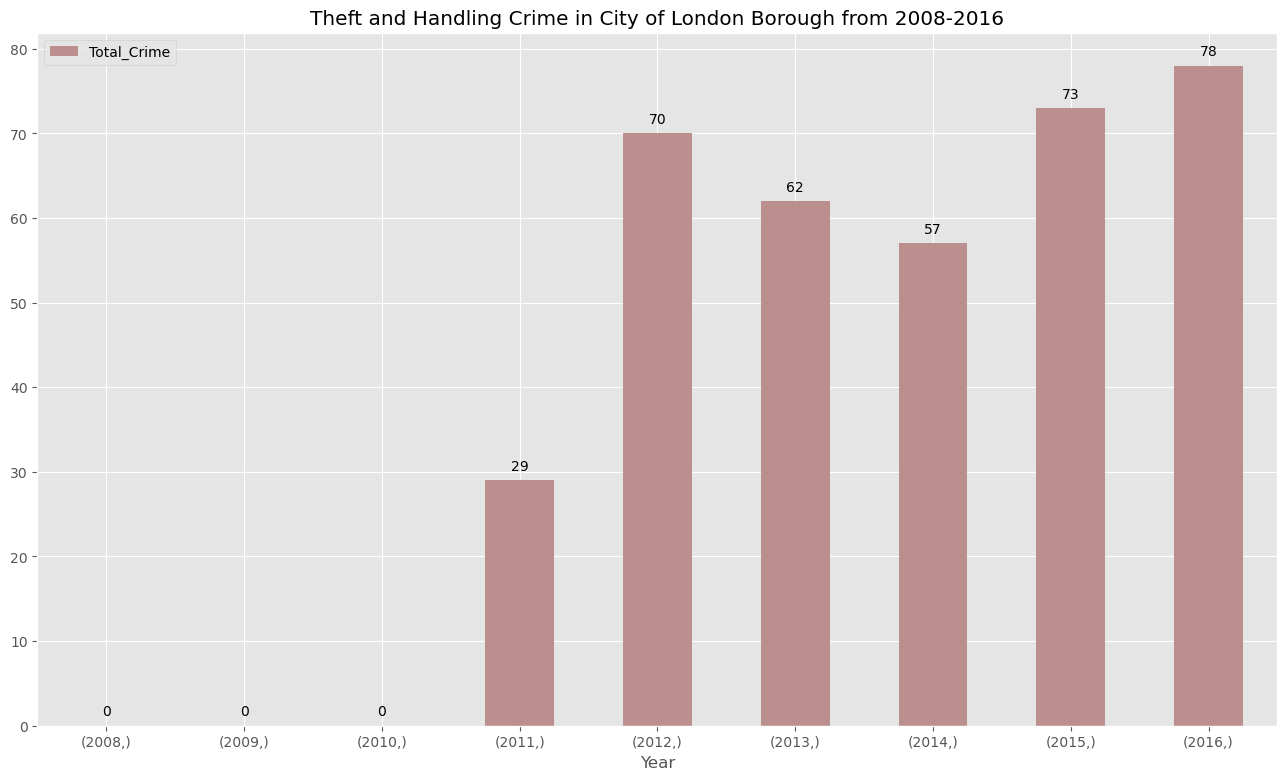

In [37]:
ax = df_x.plot(kind='bar',     
              figsize=(16, 9),
              color='rosybrown', 
              rot=0 
              )

ax.set_title('Theft and Handling Crime in City of London Borough from 2008-2016')
ax.set_xlabel('Year')
ax.legend(loc='upper left') 

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 10, 
               )

## Question 
### What Month Theft and Handling Crime Occurred Most Frequently in City of London 2016?

In [38]:
df_x = df[(df['Borough']=='City of London') & (df['Major_Category'] == 'Theft and Handling') & (df['Year'] == 2016)]
df_x = df_x['Month'].value_counts().reset_index()

df_x.columns = ['Month', 'Total_Crime']
df_x = df_x.sort_values('Month').set_index('Month')
df_x.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Des']
df_x

,Total_Crime
Jan,3
Feb,6
Mar,5
Apr,4
May,5
June,5
July,4
Aug,10
Sep,8
Oct,10


#### Menampilkan plot bar untuk meviasualisasikan data

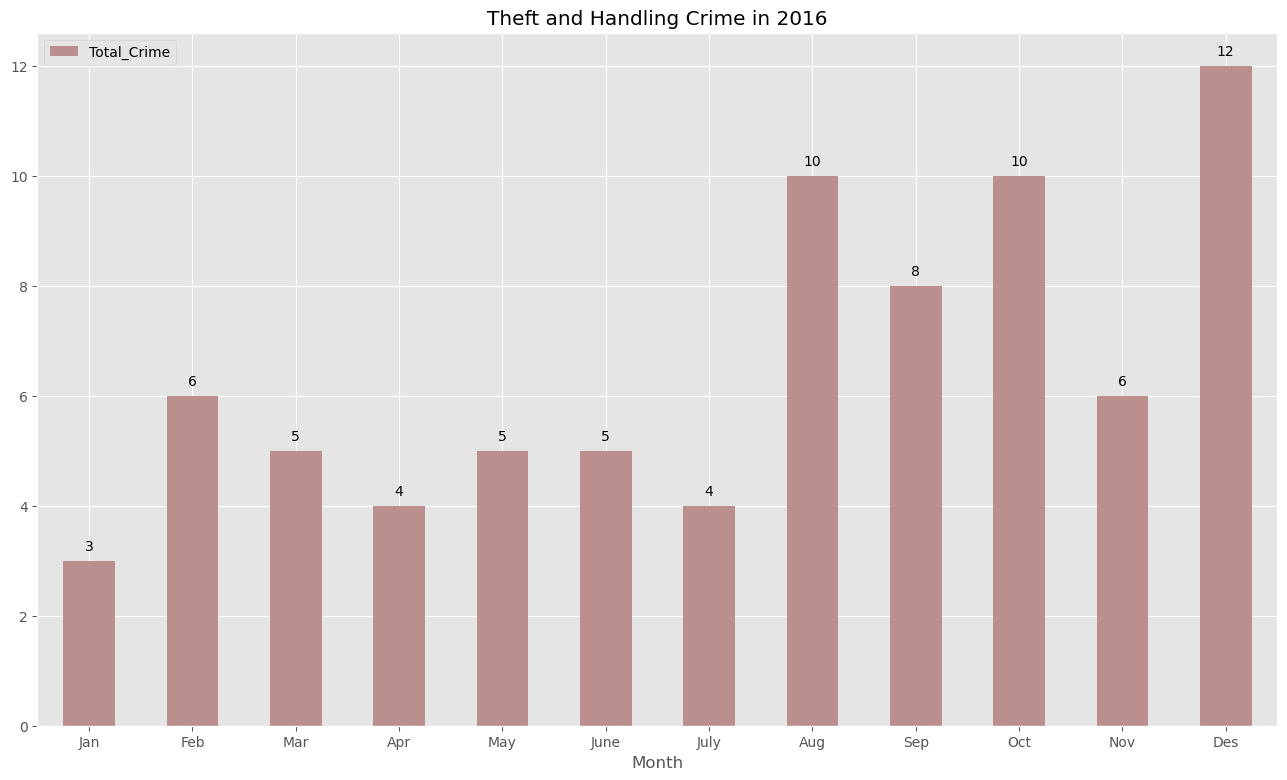

In [39]:
ax = df_x.plot(kind='bar', 
              figsize=(16, 9),
              color='rosybrown', 
              rot=0 
              )

ax.set_title('Theft and Handling Crime in 2016')
ax.set_xlabel('Month')
ax.legend(loc='upper left') 

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 10, 
               )

Kejahatan Major Category Theft and Handling di City of London pada tahun 2016 terjadi dengan frekuensi yang tinggi di bulan Desember dengan total 12 kasus. Sebaliknya pada bulan Januari, kejahatan ini hanyak terjadi sebanyak 3 kali.

## Top 10 Dangerous Borough in London from 2008-2016
#### Menampilkan 10 wilayah dengan tindak kejahatan kriminal paling tinggi  berdasarkan Borough dan Major Category

In [40]:
df_crime = pd.pivot_table(df,values='Value',
                             index=['Borough'],
                             columns=['Major_Category'],
                             aggfunc=np.sum,fill_value=0)
df_crime.head()

Major_Category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
Borough,,,,,,,,,
Barking and Dagenham,18103,18888,9188,205,2819,6105,49,50999,43091
Barnet,36981,21024,9796,175,2953,7374,38,87285,46565
Bexley,14973,17244,7346,106,1999,2338,22,40071,30037
Brent,28923,20569,25978,157,3711,12473,39,72523,63178
Bromley,27135,24039,8942,196,2637,4868,31,69742,46759


In [41]:
df_crime['Total_Crime'] = df_crime.sum(axis=1)
df_crime = df_crime.sort_values(['Total_Crime'], axis = 0, ascending=False)
df_crime = df_crime.head(10)
df_crime

Major_Category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person,Total_Crime
Borough,,,,,,,,,,
Westminster,29295,20405,34031,273,6148,15752,59,277617,71448,455028
Lambeth,30199,26136,25083,137,4520,18408,70,114899,72726,292178
Southwark,27980,24450,27381,321,4696,16153,40,109432,68356,278809
Camden,27939,18482,21816,123,3857,9286,36,140596,53012,275147
Newham,25356,24177,18389,323,4456,16913,43,106146,66221,262024
Croydon,33376,31218,19162,270,4340,12645,55,91437,67791,260294
Ealing,30831,25613,18591,175,4406,9568,52,93834,68492,251562
Islington,22207,18354,16553,85,3675,8736,40,107661,52975,230286
Tower Hamlets,21510,21593,23408,124,4268,10050,47,87620,59993,228613


#### Menampilkan pie plot untuk meviasualisasikan data

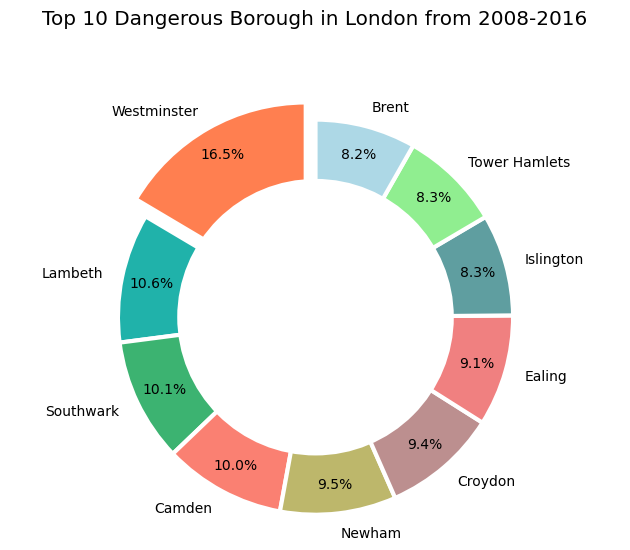

In [42]:
color_list = ['coral', 'lightseagreen', 'mediumseagreen', 'salmon', 'darkkhaki', 'rosybrown', 'lightcoral', 'cadetblue', 'lightgreen', 'lightblue']
explode_list = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
total = df_crime['Total_Crime']
label_list = df_crime.index

fig1, ax1 = plt.subplots()

plt.pie(total, 
        colors=color_list, 
        labels=label_list, 
        autopct='%1.1f%%',
        pctdistance=0.85, 
        startangle=90, 
        explode=explode_list,
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },
       )


centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()

plt.title('Top 10 Dangerous Borough in London from 2008-2016', y=1.12) 
plt.show()

Berdasarkan pie chart yang diambil dari data kejahatan London 2008-2016, Westminster merupakan wilayah dengan tingkat krimnalitas tertinggi dibandingkan wilayah lainnya, yaitu sebesar 16,5%. 

## Compare the Distribution of The Number of Total Crime for Period 2008-2012

#### Mengelompokkan tahun menjadi variabel list

In [43]:
df_years = list(map(str, range(2008, 2017)))
df_years

['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']

#### Membuat dataframe dengan index Year 

In [44]:
df_crime_bg = pd.pivot_table(df,values='Value',
                             index='Year',
                             columns='Borough',
                             aggfunc=np.sum,fill_value=0)
df_crime_bg.head()

Borough,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
Year,,,,,,,,,,,,,,,,,,,,,
2008,17656,23944,15305,23504,24015,32010,0,29516,28947,21980,...,13875,29752,20873,11106,33470,12943,23578,24080,23330,47846
2009,17713,23449,14445,24748,21858,31612,0,29784,28617,21147,...,13561,28610,20837,10618,30623,12240,21959,24761,23021,48456
2010,17130,23416,13166,25512,19572,31804,0,29373,31360,20808,...,13595,30728,20652,10601,31320,12032,23072,24818,22815,48116
2011,16686,24007,11325,27669,19868,33956,69,29830,29537,21041,...,13548,27978,21994,10896,30723,11068,24712,23714,21384,54243
2012,15990,23573,11669,26357,19622,31472,157,30189,28832,21069,...,12856,30067,21424,11168,30737,10948,26784,22647,24457,59226


#### Membuat dataframe baru untuk tahun 2010 dan 2011

In [45]:
df_crime_bp = df_crime_bg.loc[[2010, 2011]].transpose()

#### Menampilkan deskriptif statistik untuk index 2010 dan 2011

In [46]:
df_crime_bp.describe()

Year,2010,2011
count,33.000000,33.000000
mean,21676.484848,21967.121212
std,8640.040332,9415.621198
min,0.000000,69.000000
25%,17130.000000,16686.000000
50%,21941.000000,21994.000000
75%,24818.000000,24980.000000
max,48116.000000,54243.000000


#### Menampilkan perbandingan distribusi jumlah tindak kriminal tahun pada 2008-2012 dengan pie plot

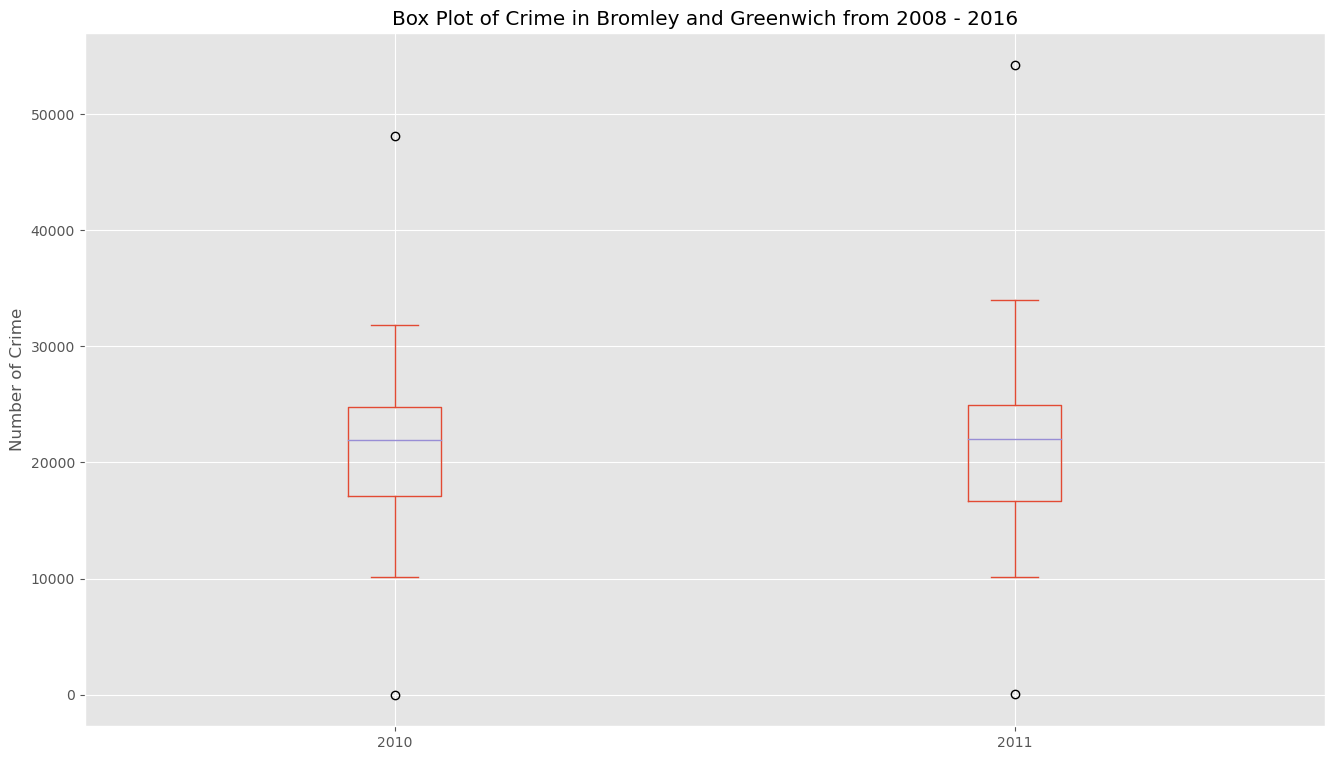

In [47]:
df_crime_bp.plot(kind='box',
                figsize=(16,9),
               )

plt.title('Box Plot of Crime in Bromley and Greenwich from 2008 - 2016')
plt.ylabel('Number of Crime')
plt.show()

Dari box plot tersebut, meskipun pada tahun 2010 dan 2011 memiliki rata-rata jumlah kejahatan yang sama (~19000.), range total kejahatan pada tahun 2011 lebih tersebar daripada tahun 2010. Total kejahatan maksimum pada tahun 2010 untuk setiap tahun (19572) sekitar 1,49% lebih rendah dari populasi maksimum di tahun 2010 (19868).

#### Membuat dataframe baru untuk Borough Bromley dan Greenwich

In [48]:
df_crime_bg = df_crime_bg[['Bromley', 'Greenwich']]

#### Menampilkan deskriptif statistik dataframe

In [49]:
df_crime_bg.describe()

Borough,Bromley,Greenwich
count,9.000000,9.000000
mean,20483.222222,20174.222222
std,1560.058555,1466.644365
min,18945.000000,18552.000000
25%,19622.000000,18948.000000
50%,19868.000000,19894.000000
75%,20637.000000,20929.000000
max,24015.000000,22730.000000


#### Menampilkan perbandingan distribusi jumlah tindak kriminal tahun pada 2008-2012 di wilayah Bromley dan Greenwich dengan pie plot

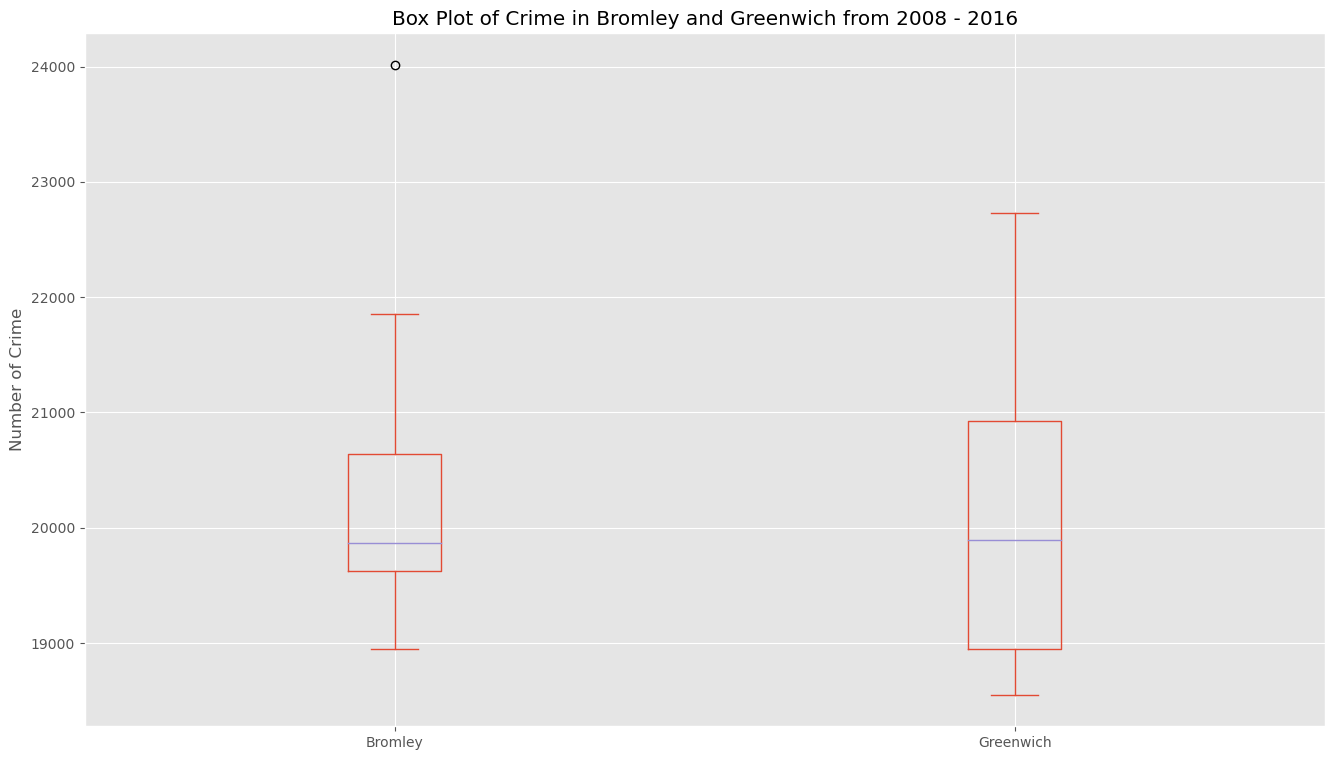

In [50]:
df_crime_bg.plot(kind='box',
                figsize=(16,9),
               )

plt.title('Box Plot of Crime in Bromley and Greenwich from 2008 - 2016')
plt.ylabel('Number of Crime')
plt.show()

Dari box plot tersebut, meskipun Bromley dan Greenwich memiliki rata-rata jumlah kejahatan yang sama (~20000), range total kejahatan di Greenwich lebih tersebar daripada Bromley. Sebaliknya, total kejahatan maksimum di Greenwich untuk setiap tahun (22730) sekitar 5,36% lebih rendah dari populasi maksimum Bromley (24015).

## Create a scatter plot of the total crime from 2008-2016 in London
#### Membuat scatter plot untuk jumlah seluruh tindak kejahatan kriminal di London pada 2008-2016

In [51]:
df_crime = pd.pivot_table(df,values='Value',
                             index=['Year'],
                             columns=['Month'],
                             aggfunc=np.sum,fill_value=0)


df_crime

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2008,65419,62626,61343,59640,62587,62290,64126,59959,58414,63354,61395,57488
2009,59142,54706,63482,59181,62897,63116,63281,58695,57847,61176,59456,54235
2010,54934,55069,63629,60085,62126,62632,63764,59040,59731,62113,60665,51536
2011,57966,54895,61282,58714,62630,61822,62428,59117,58640,63622,64119,59680
2012,62436,56735,67537,58801,64344,62281,63280,62143,56912,61728,62514,58618
2013,58933,55271,57590,55678,56765,56839,60508,57467,54924,59956,58267,54209
2014,55515,51222,57669,53467,56327,57039,58564,55641,56933,60537,59704,57565
2015,57055,53316,60096,56445,61038,60760,61606,58056,57564,62361,62487,60840
2016,58847,56697,59167,58637,63990,62262,65519,62666,61412,63405,61064,62455


In [52]:
df_crime.columns.name = None
df_crime['Total_Crime'] = df_crime.sum(axis=1)
df_crime = df_crime.reset_index()
df_crime

,Year,1,2,3,4,5,6,7,8,9,10,11,12,Total_Crime
0,2008,65419,62626,61343,59640,62587,62290,64126,59959,58414,63354,61395,57488,738641
1,2009,59142,54706,63482,59181,62897,63116,63281,58695,57847,61176,59456,54235,717214
2,2010,54934,55069,63629,60085,62126,62632,63764,59040,59731,62113,60665,51536,715324
3,2011,57966,54895,61282,58714,62630,61822,62428,59117,58640,63622,64119,59680,724915
4,2012,62436,56735,67537,58801,64344,62281,63280,62143,56912,61728,62514,58618,737329
5,2013,58933,55271,57590,55678,56765,56839,60508,57467,54924,59956,58267,54209,686407
6,2014,55515,51222,57669,53467,56327,57039,58564,55641,56933,60537,59704,57565,680183
7,2015,57055,53316,60096,56445,61038,60760,61606,58056,57564,62361,62487,60840,711624
8,2016,58847,56697,59167,58637,63990,62262,65519,62666,61412,63405,61064,62455,736121


In [53]:
df_crime = df_crime[['Year', 'Total_Crime']]
df_crime

,Year,Total_Crime
0,2008,738641
1,2009,717214
2,2010,715324
3,2011,724915
4,2012,737329
5,2013,686407
6,2014,680183
7,2015,711624
8,2016,736121


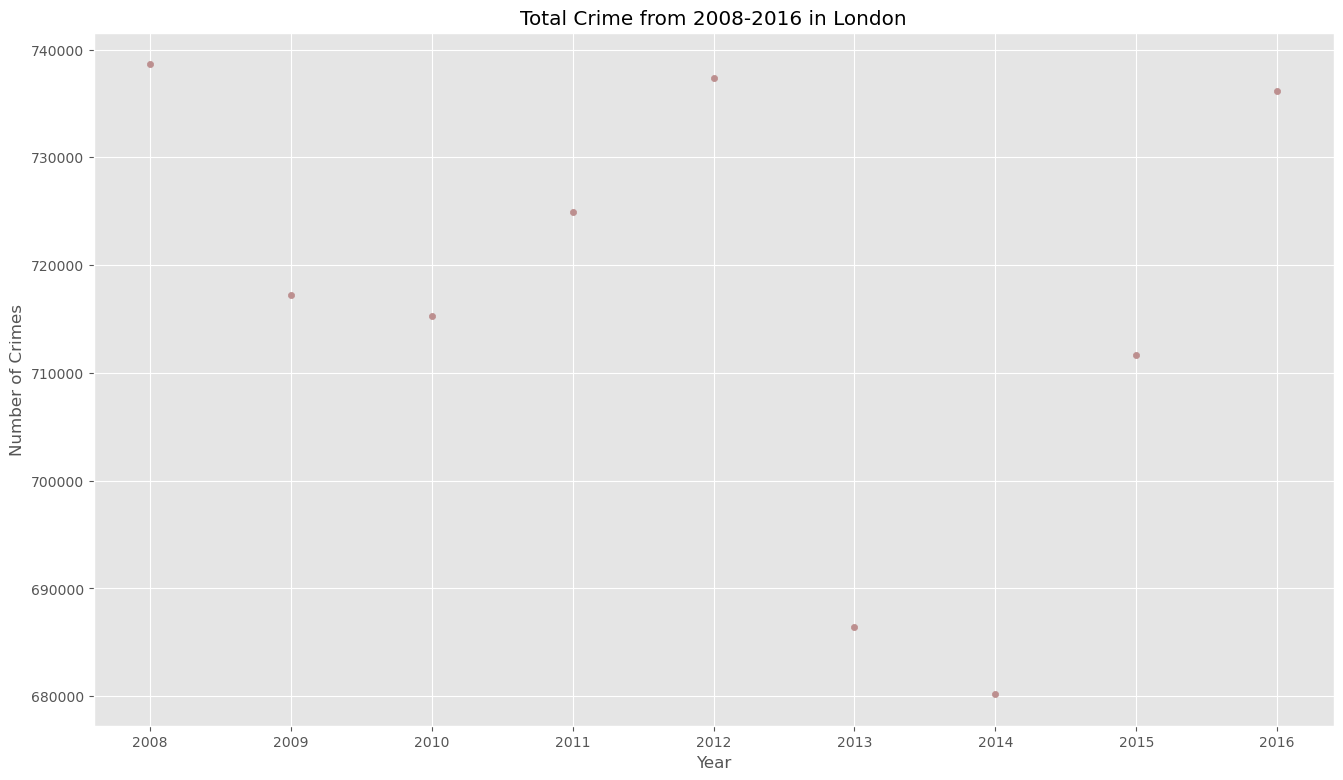

In [54]:
df_crime.plot(kind='scatter',
             x='Year',
             y='Total_Crime',
             figsize=(16,9),
             color='rosybrown'
            )

plt.title('Total Crime from 2008-2016 in London')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')

plt.show()

Berdasarkan scatter plot di atas, terlihat bahwa kejahatan terjadi dengan frekuensi yang tinggi di 2008, yaitu 738641. Selanjutnya setiap tahunnya mengalami fluktuasi dan terjadi penurunan drastis dari tahun 2012 ke tahun 2013, yaitu sebanyak 6.9%.  

## Create a word clouds of the borough in London

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3419099 entries, 9 to 13490600
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   LSOA_Code       object
 1   Borough         object
 2   Major_Category  object
 3   Minor_Category  object
 4   Value           int64 
 5   Year            int64 
 6   Month           int64 
dtypes: int64(3), object(4)
memory usage: 208.7+ MB


In [56]:
df_wc = pd.read_csv('london_crime_by_lsoa.csv')
text = ' '.join(i for i in df.Borough.astype(str))

# text = df['Minor_Category'].values

In [57]:
print ("There are {} words in the combination of all cells in column Borough.".format(len(text)))

There are 35457599 words in the combination of all cells in column Borough.


In [58]:
stopwords = set(STOPWORDS)

In [59]:
crime_wc = WordCloud(background_color = 'white',
                     max_words=2000,
                     stopwords=stopwords
                    ).generate(text)

In [60]:
crime_mask = np.array(Image.open('crime_mask3.png'))

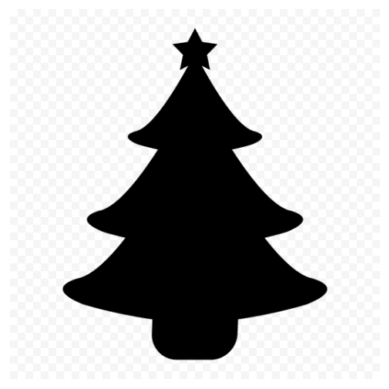

In [61]:
plt.imshow(crime_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

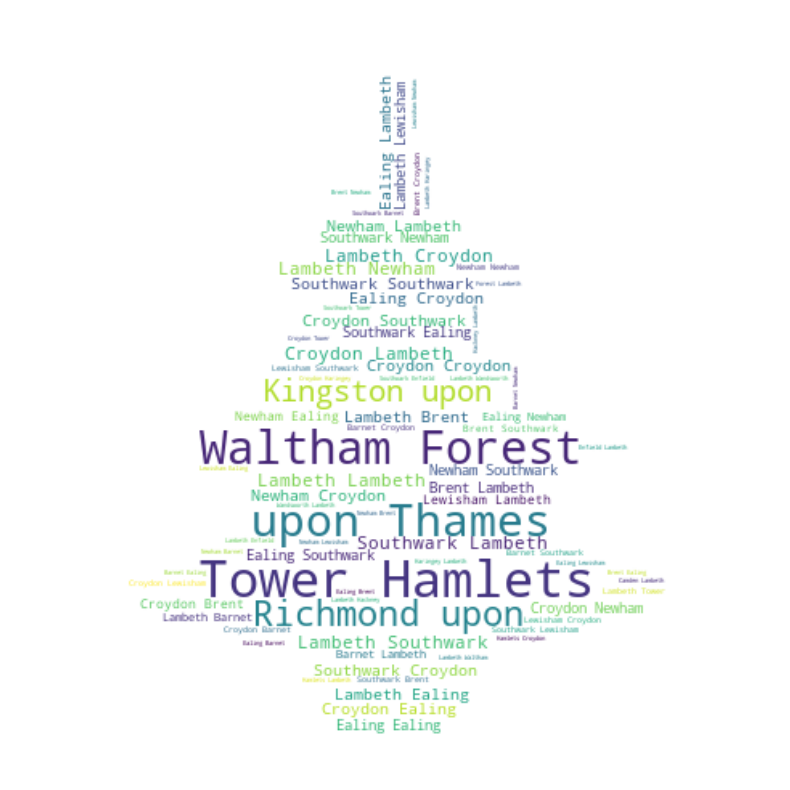

In [62]:
crime_wc = WordCloud(background_color = 'white',
                     max_words=2000,
                     stopwords=stopwords,
                     mask=crime_mask
                    ).generate(text)

fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(10)

plt.imshow(crime_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Create a folium map of the borough in London

In [63]:
import geopandas as gpd
london_map = gpd.read_file('London_Borough_Excluding_MHW.shp')
crimesPerBorough = df.groupby('Borough')['Value'].sum()
joined = london_map.set_index('NAME').join(crimesPerBorough)

joined['coords'] = joined['geometry'].\
    apply(lambda x: x.representative_point().coords[:])
joined['coords'] = [coords[0] for coords in joined['coords']]

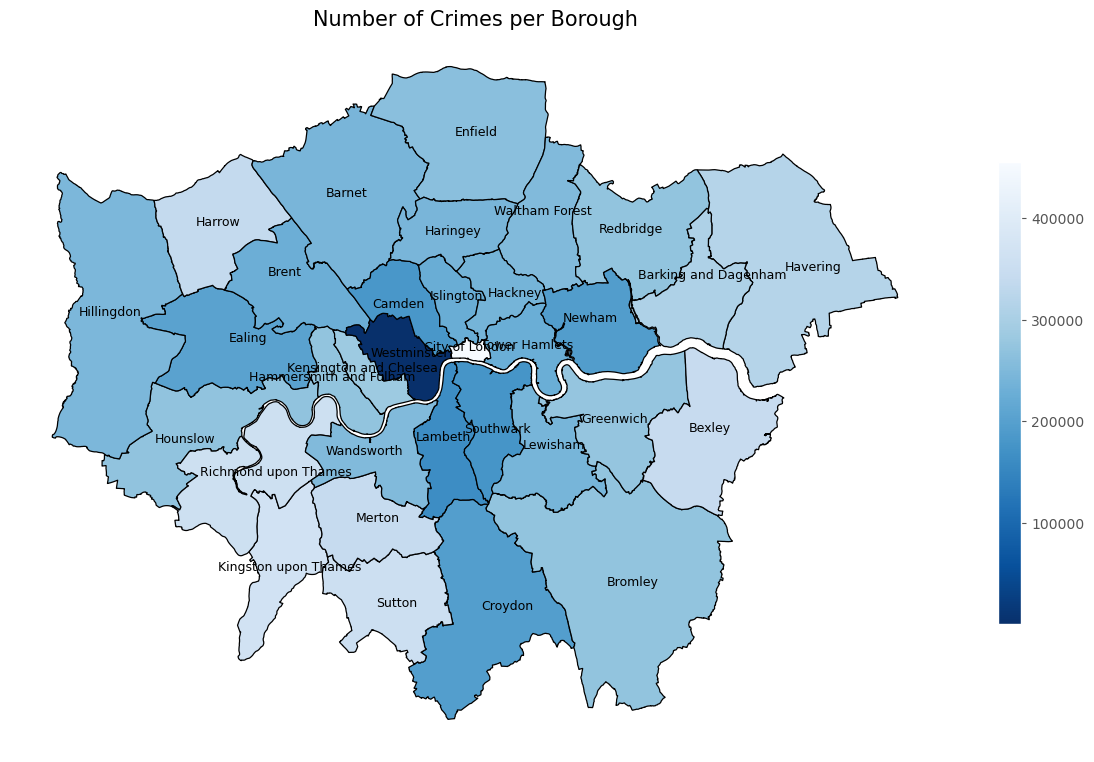

In [64]:
joined.plot(column='Value', cmap='Blues', linewidth=0.9, edgecolor='black', 
            figsize=(15, 12))
plt.axis('off')
plt.title('Number of Crimes per Borough', fontsize=15)
scalarMap = plt.cm.ScalarMappable(cmap='Blues_r', 
                           norm=plt.Normalize(vmin=min(joined['Value']), 
                                              vmax=max(joined['Value'])))
scalarMap._A = []
cbar = plt.colorbar(scalarMap, shrink=0.5)
for idx, row in joined.iterrows():
    plt.annotate(text=idx, xy=row['coords'],
                 horizontalalignment='center', fontsize=9)

In [65]:
# london latitude and longitude values
latitude = 51.5286417
longitude = -0.1015987

In [66]:
df_borough = pd.DataFrame(
    df.groupby('Borough')['Value'].sum().sort_values()
)
df_borough.head()

,Value
Borough,
City of London,780
Kingston upon Thames,89306
Richmond upon Thames,96771
Sutton,100987
Bexley,114136


In [67]:
df_borough.reset_index(inplace=True)

In [68]:
world_geo = r'https://raw.githubusercontent.com/radoi90/housequest-data/master/london_boroughs.geojson' # geojson file

# create a plain world map
london_map = folium.Map(location=[51.5286417, -0.1015987], zoom_start=9.5)

# generate choropleth map using london crime by lsoa
london_map.choropleth(
    geo_data=world_geo,
    data=df,
    columns=['Borough', 'Value'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', #Yellow, Orange, Red
    fill_opacity=0.7, 
    line_opacity=0.7,
    legend_name='Crime rate in boroughs of london'
)

# display map
london_map

## Conclusion

Tujuan dari proyek ini adalah membantu orang untuk mendapatkan pemahaman mengenai lingkungan yang aman di Kota London. Proyek ini dapat bermanfaat untuk orang yang akan pindah dan menetap atau sekadar berkunjung ke London agar mereka mengetahui tingkat kriminalitas pada setiap wilayah di London dan mengetahui kejahatan apa yang terjadi dengan frekuensi yang tinggi di wilayah tersebut. Selain itu, proyek ini juga dapat digunakan untuk melihat riwayat kejahatan setiap wilayah di Kota London baik kejahatan dalam kategori besar maupun kecil dari tahun 2008-2016 untuk nantinya dilakukan evaluasi untuk mengurangi tingkat kriminalitas tersebut. Dari analisis yang telah dilakukan, Westminster merupakan wilayah dengan tingkat kriminalitas paling tinggi sehingga diperlukan kewaspadaan yang tinggi saat berada di wilayah ini. Sebaliknya, City of London merupakan wilayah dengan tingkat kriminalitas paling rendah dan wilayah yang paling aman di Kota London. Dari rentang waktu 2008-20016, kejahatan paling banyak dilaporkan pada tahun 2016 dan tahun 2013 menjadi tahun dengan tingkat kejahatan paling rendah. Kejahatan dalam major category yang terjadi dengan frekuensi yang tinggi sepanjang tahun 2008-2016 adalah Theft and Handling sedangkan kejahatan dalam minor category yang terjadi dengan frekuensi yang tinggi sepanjang tahun 2008-2016 adalah Common Assault dan Burglary in Dwelling. Untuk proyek selanjutnya, selain tingkat kriminalitas, diharapkan lebih banyak aspek seperti biaya hidup dan fasilitias yang terdapat di wilayah tersebut ditambahkan untuk dapat dijadikan bahan pertimbangan.